In [1]:
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('/home/josejm/python-analysis/repositories3.csv', names=['author', 'file', 'lineNum', 'method', 'idiom', 'repository'])

In [3]:
dfNoDup = df.drop_duplicates()

In [4]:
# get a colum and calculate the number of each
authorRanking = df['author'].value_counts()

# get the more used idiom
idiomRanking = df['idiom'].value_counts()

# the repositories ranking
repoRanking = df['repository'].value_counts()

# line number
lineRanking = df['lineNum'].value_counts()

# file ranking
fileRanking = df['file'].value_counts()

# method ranking
methodRanking = df['method'].value_counts()

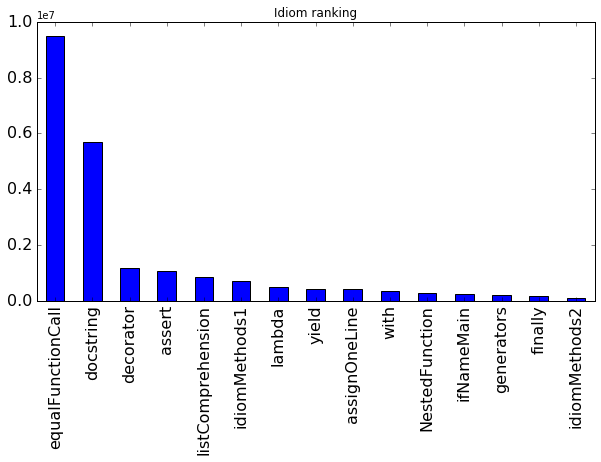

In [5]:
# idiom ranking
idiomRanking[:15].plot(kind='bar', figsize=(10, 5), title='Idiom ranking', fontsize=16)

In [6]:
# Filter equalFunctionCall to one per line found
#eqFuncCallRows = df.loc[df.idiom == 'equalFunctionCall', :]
#print "Duplicated:", len(eqFuncCallRows)
#eqFuncCallRows2 = eqFuncCallRows.drop_duplicates()
#print "One / line:", len(eqFuncCallRows2)

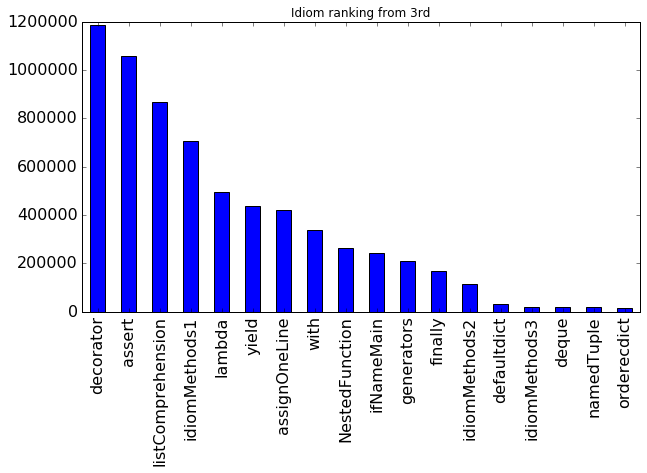

In [7]:
# Idiom ranking from third
idiomRanking[2:].plot(kind='bar', figsize=(10, 5.2), title='Idiom ranking from 3rd', fontsize=16)

In [8]:
# How many files are documentated at least one time?
totalFiles = len(df['file'].unique())
docstringIdioms = df.loc[df.idiom == 'docstring', :]
docFilesNum = len(docstringIdioms['file'].unique())
print float(docFilesNum)/float(totalFiles) *100, '%'

65.0671715359 %


equalFunctionCall    85.391453
docstring            75.442323
ifNameMain           66.650362
listComprehension    52.607821
decorator            40.899181
idiomMethods1        38.115270
assignOneLine        38.091511
lambda               36.394891
with                 31.764821
assert               25.081756
generators           24.764514
NestedFunction       24.388574
yield                21.849233
finally              18.524471
idiomMethods2        16.939654
defaultdict           6.557285
idiomMethods3         5.015792
namedTuple            4.024932
deque                 3.829276
orderecdict           1.950974
Name: idiom, dtype: float64


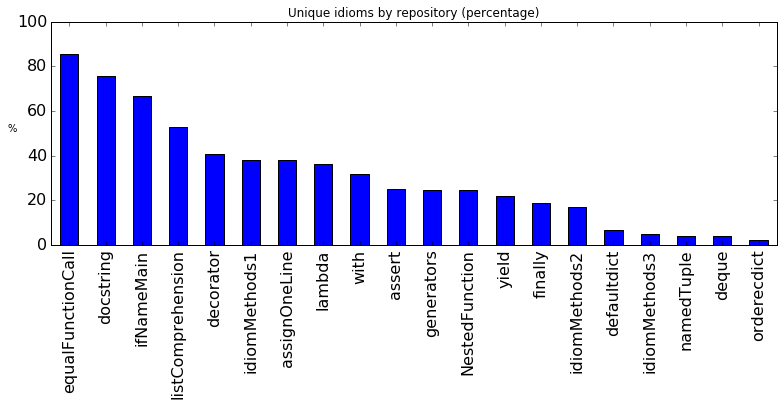

In [9]:
# Unique idioms by repository (percentage)
idiomRepoUnique = df[['repository', 'idiom']].drop_duplicates()['idiom'].value_counts()
totalRepos = len(df['repository'].unique())
idiomsPercentages = (idiomRepoUnique / totalRepos * 100)
idiomsPercentages.plot(kind='bar', figsize=(13, 4), title='Unique idioms by repository (percentage)', fontsize=16, ylim=(0, 100)).set_ylabel('%', rotation=0)
print idiomsPercentages

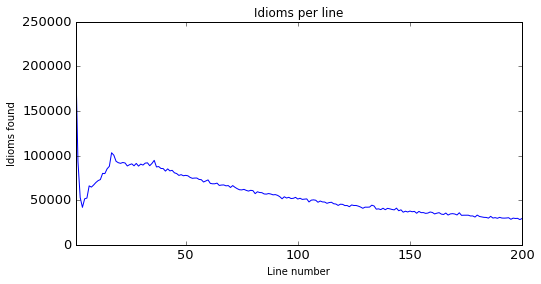

In [10]:
#Idioms por linea
lineFig = lineRanking.sort_index()[:200].plot(figsize=(8, 4), title='Idioms per line', fontsize=13)
lineFig.set_xlabel('Line number')
lineFig.set_ylabel('Idioms found')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee06acd990>], dtype=object)

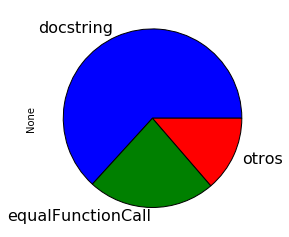

In [11]:
# Idioms in 10 first lines
dfFirstLines = df[df['lineNum'] <= 10]
idiomsPercent10 = dfFirstLines['idiom'].value_counts(normalize=True)*100

#abbreviated
newIdiomsPercent = idiomsPercent10[:2].append(pd.Series({'otros': sum(idiomsPercent10[2:])}))
newIdiomsPercent.plot.pie(subplots=True,figsize=(4, 4), fontsize=16)
# This show that the files are documented and that's the reason that between lines 1-20 there aren't enough idioms

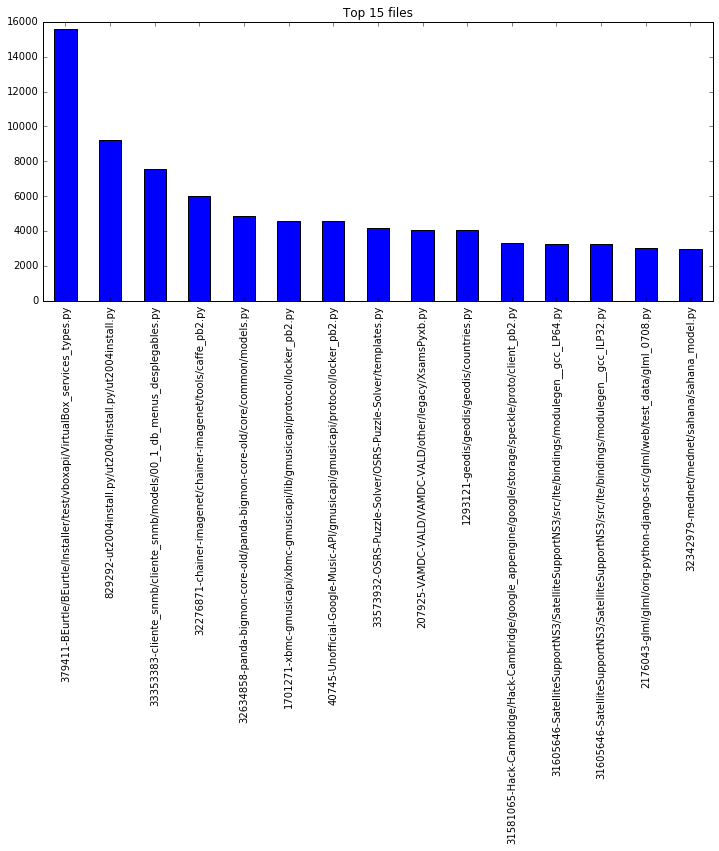

In [12]:
# top 15 files
fileHist = fileRanking[:15].plot(kind='bar', figsize=(12, 5), title='Top 15 files')

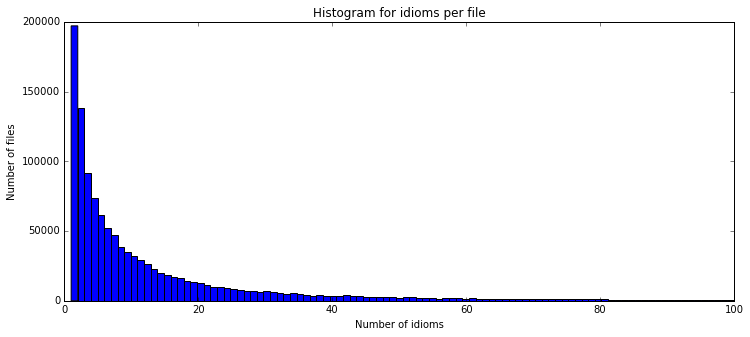

In [13]:
# Frecuencia de idioms por fichero
filesHist = fileRanking.plot(kind='hist', bins=100, range=(1,100), figsize=(12, 5), title='Histogram for idioms per file')
filesHist.set_xlabel('Number of idioms')
filesHist.set_ylabel('Number of files')

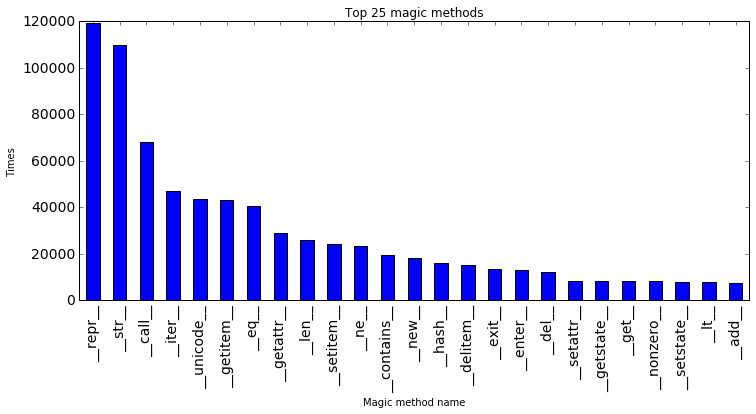

In [14]:
# Top magic methods
methodPlot = methodRanking[:25].plot(kind='bar', figsize=(12, 5), title='Top 25 magic methods', fontsize=14)
methodPlot.set_xlabel('Magic method name')
methodPlot.set_ylabel('Times')

In [15]:
# get the magic methods of a category
#idiomMethods = df.query('(idiom == "idiomMethods1") or (idiom == "idiomMethods2") or (idiom == "idiomMethods3")')
print df.query('idiom == "idiomMethods3"')['method'].value_counts()

__nonzero__          8265
__reduce_ex__        1596
__getnewargs__       1097
__missing__          1045
__ixor__              640
__lshift__            560
__rmod__              535
__rpow__              466
__rtruediv__          452
__rshift__            452
__getinitargs__       412
__rfloordiv__         367
__divmod__            311
__rxor__              297
__bytes__             290
__rdivmod__           258
__instancecheck__     225
__index__             205
__itruediv__          196
__sizeof__            177
__coerce__            160
__rlshift__           155
__ifloordiv__         154
__rrshift__           146
__ilshift__           139
__subclasscheck__     132
__ipow__              109
__trunc__              88
__irshift__            67
__imod__               62
__floor__              21
__ceil__               21
__idivmod__             2
Name: method, dtype: int64


242.108025121
214.723743975


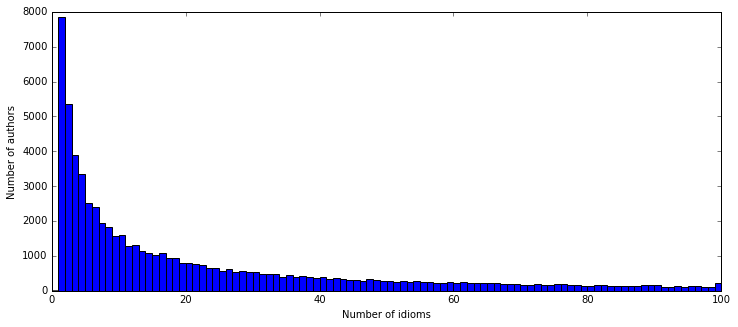

In [16]:
# Análisis de los autores
# best AUTHORS with duplicated and no duplicated lines
authorHist = authorRanking.plot(kind='hist', figsize=(12, 5), bins= 100, range=(0,100))
authorHist.set_xlabel('Number of idioms')
authorHist.set_ylabel('Number of authors')
#dfNoDup['author'].value_counts().hist(figsize=(12, 5), bins= 100, range=(0,100))

#authorRanking
#mirar df.drop_duplicates()
#df['author'].value_counts()[:25].plot(kind='bar', title='Authors ranking')
print df['author'].value_counts().mean()
print dfNoDup['author'].value_counts().mean()
#authorRanking.count()

In [17]:
#df2['author'].value_counts()[:25].plot(kind='bar', title='Authors ranking')
#df2['author'].value_counts().mean()

88.77170889879663

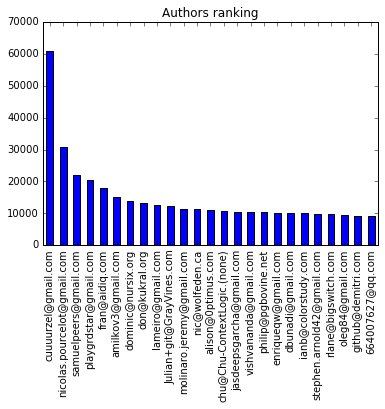

In [38]:
#df3['author'].value_counts()[:25].plot(kind='bar', title='Authors ranking')
#df3['author'].value_counts().mean()

total idioms: 21789671
total repositories: 71554
mean 304.520655729
median 39.0
39 402


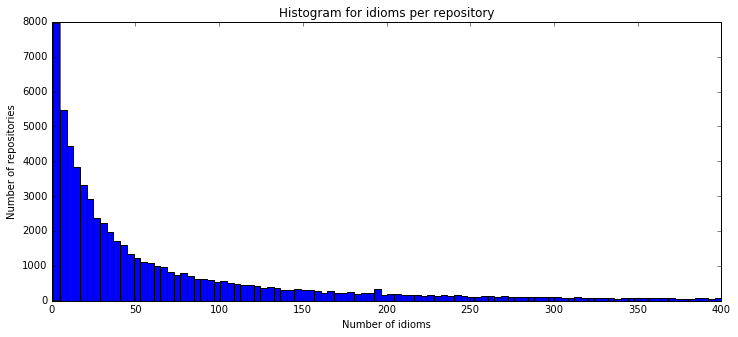

In [54]:
# Frecuencia de idioms por repositorio
reposHist = repoRanking.plot(kind='hist',  bins=100, range=(1,400), figsize=(12, 5), title='Histogram for idioms per repository')
reposHist.set_xlabel('Number of idioms')
reposHist.set_ylabel('Number of repositories')
print "total idioms:", sum(repoRanking)
print "total repositories:", len(repoRanking)
timesIdioms = repoRanking.value_counts().sort_index()

# mean:
print "mean", repoRanking.mean()
print "median", repoRanking.median()
#print "mode", repoRanking.mode()

total = 0
for numIdioms, times in timesIdioms.iteritems():
#    print numIdioms, times
    total += times
    if total >= len(repoRanking)/2:
        print numIdioms, times
        break
        
# remove duplicated (270.35068) (Require time)
#dfNoDup = df.drop_duplicates()
#print "No duplicated mean:", dfNoDup['repository'].value_counts().mean()


In [39]:
repoIdiomUnique = df[['repository', 'idiom', 'method']].drop_duplicates()

mean:  8.09346787042
5 7008
count     108.000000
mean      662.537037
std      1759.859693
min         1.000000
25%         7.750000
50%        32.000000
75%       228.000000
max      8792.000000
Name: repository, dtype: float64
1    5765
2    7504
3    8349
4    8792
5    7008
Name: repository, dtype: int64
52.2933728373


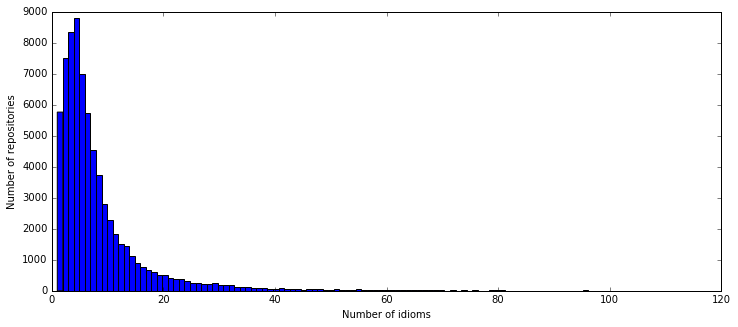

In [95]:
repoIdiomUniqueHist = repoIdiomUnique['repository'].value_counts().plot(kind='hist', bins=114, figsize=(12, 5))
repoIdiomUniqueHist.set_xlabel('Number of idioms')
repoIdiomUniqueHist.set_ylabel('Number of repositories')

#repoIdiomUniqueHist= repoIdiomUnique['repository'].value_counts().value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
#repoIdiomUniqueHist.set_xlabel('Number of idioms')
#repoIdiomUniqueHist.set_ylabel('Number of repositories')

print "mean: ", repoIdiomUnique['repository'].value_counts().mean()
timesRepos = repoIdiomUnique['repository'].value_counts().value_counts().sort_index()

total = 0
for num_idioms, num_repos in timesRepos.iteritems():
    total += num_repos
    if total > sum(timesRepos)/2:
        print num_idioms, num_repos
        break
    
print timesRepos.describe()
print timesRepos[:5]
#repoIdiomUnique['idiom'].value_counts()


print sum(timesRepos[:5])/float(sum(timesRepos))*100

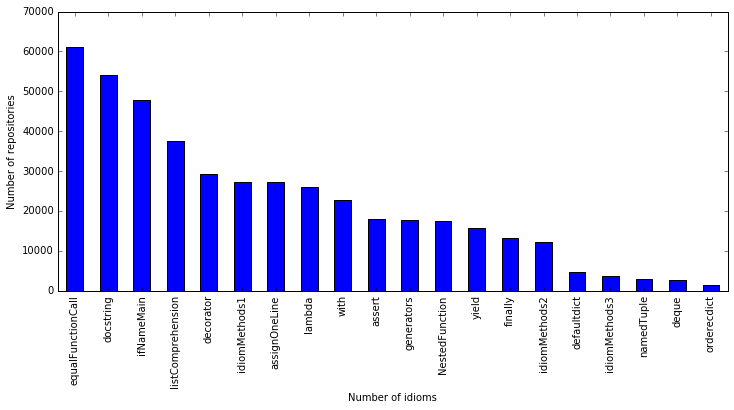

In [21]:
idiomUniqueHist = repoIdiomUnique['idiom'].value_counts().plot(kind='bar', figsize=(12, 5))
idiomUniqueHist.set_xlabel('Number of idioms')
idiomUniqueHist.set_ylabel('Number of repositories')

In [136]:
# relacion autores-repositorio
author_repo_unique =  df[['repository', 'author']].drop_duplicates()['repository'].value_counts().value_counts().sort_index()
#print author_repo_unique[9:]
print sum(author_repo_unique[4:])/float(sum(author_repo_unique))*100


5.95634066579


71554